In [612]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, normalize
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

from imblearn.over_sampling import SMOTE

In [613]:
def get_feature_columns(df, target_column):
    columns = list(df.columns)
    while(target_column in columns):
        columns.remove(target_column)
    return columns

In [614]:
# Reading the data into a dataframe
path_to_files = "/Users/rbu/Documents/Personal Documentation/Online_Courses/ml-demo/datasets/supervised/heart_disease/framingham.csv"
print(path_to_files)
df = pd.read_csv(path_to_files)

df_copy = df

/Users/rbu/Documents/Personal Documentation/Online_Courses/ml-demo/datasets/supervised/heart_disease/framingham.csv


In [615]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [616]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [617]:
df.shape

(4238, 16)

In [618]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [619]:
df = df.dropna(axis=0)

In [620]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.6 KB


/var/folders/rn/9n68dmx944s40xtf_9mjdcsw0000gn/T/ipykernel_6940/2410725124.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(column=df.columns, bins=20, layout=(4, 4), ax=ax)


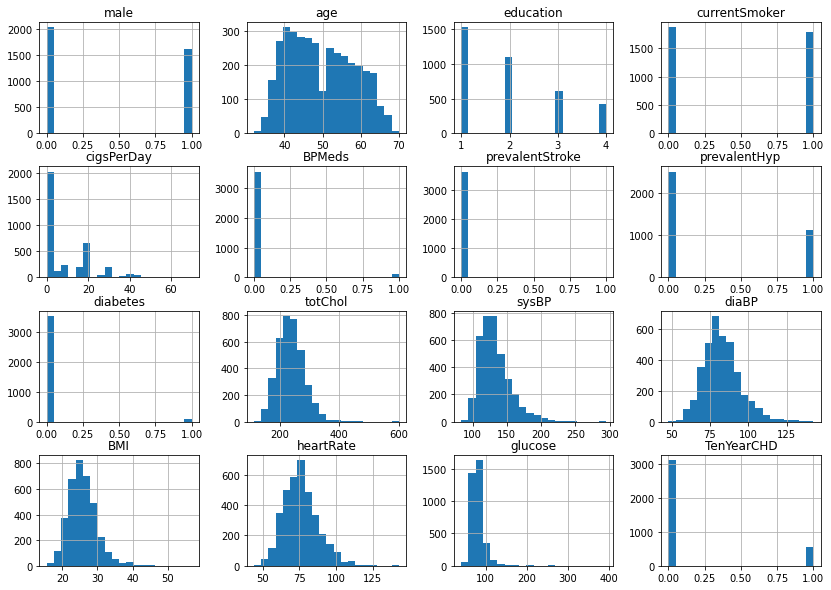

In [621]:
# Investigate data distribution:
fig, ax = plt.subplots(figsize=(14, 10))
df.hist(column=df.columns, bins=20, layout=(4, 4), ax=ax)
plt.show()

'Notice that there are more 0 = No (10 year risk of hear disease?) than 1 = Yes, possibly look to balance the dataset Using under or over-sampling'

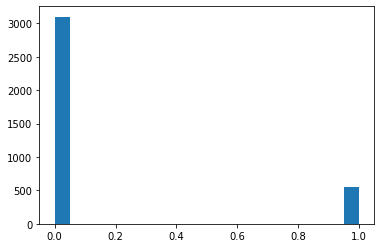

In [622]:
# Balance of predictor variable:
hear_dis_outcomes = df["TenYearCHD"].values
plt.hist(hear_dis_outcomes, bins = 20, label = "TenYearCHD distribution")

"""Notice that there are more 0 = No (10 year risk of hear disease?) than 1 = Yes, possibly look to balance the dataset Using under or over-sampling"""

In [623]:
target_column = 'TenYearCHD'
df_target = df[target_column]

In [624]:
feature_columns = get_feature_columns(df=df, target_column=target_column)
print(feature_columns)

['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [625]:
num_features = len(feature_columns)
features = df[feature_columns]
features = features.fillna(0)

print("Features: {} and count: {}".format(feature_columns, num_features))

Features: ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'] and count: 15


In [626]:
features.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [627]:
model = RandomForestClassifier()
model.fit(features, df_target)

RandomForestClassifier()

<AxesSubplot:>

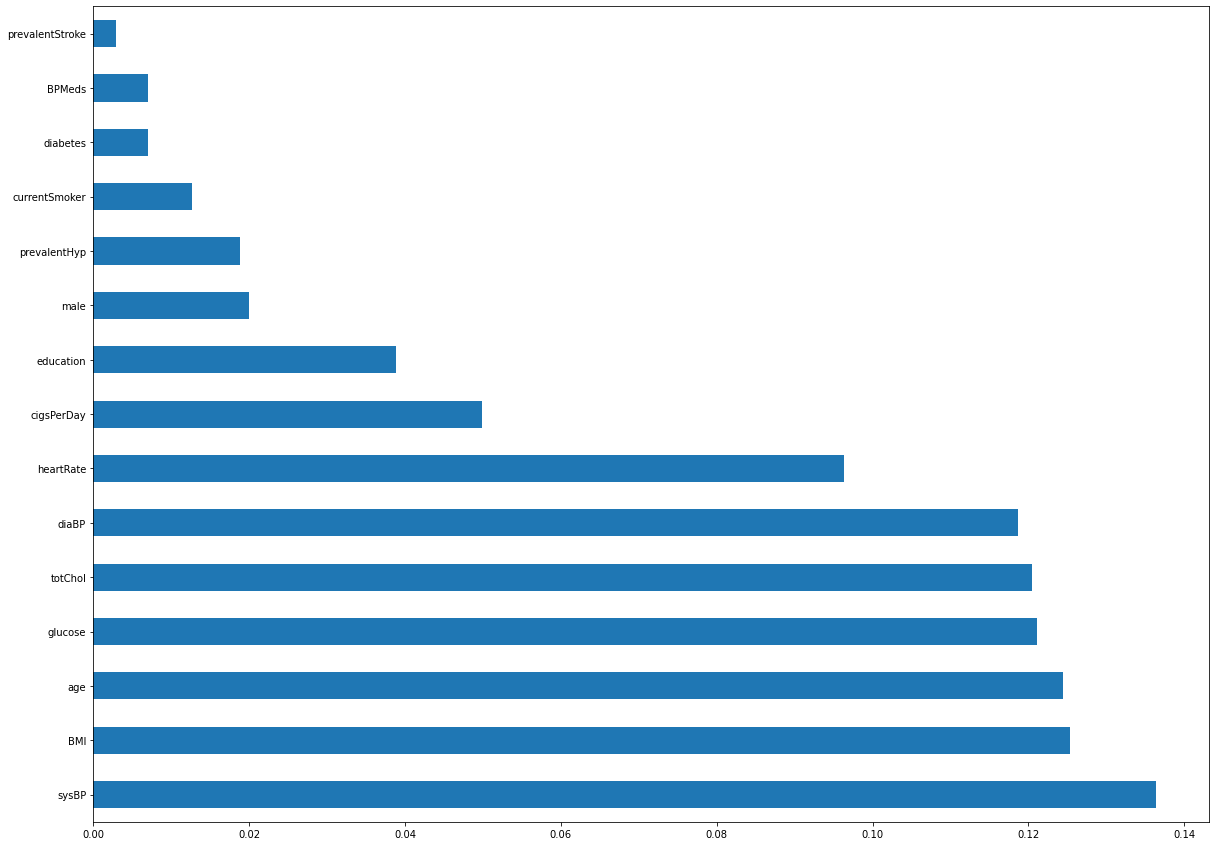

In [628]:
# Looking into the importance of each feature in predicting an 1/0 outcome:
plt.subplots(figsize=(20,15))
feat_importances = pd.Series(model.feature_importances_, index=feature_columns)
feat_importances.nlargest(num_features).plot(kind='barh')

In [629]:
oversampler = SMOTE(sampling_strategy=0.9)

X_over, y_over = oversampler.fit_resample(features.values, df_target)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2)


In [630]:
X_df = pd.DataFrame(X_over)
X_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,5888.000000,5888.000000,5888.000000,5888.000000,5888.000000,5888.000000,5888.000000,5888.000000,5888.000000,5888.000000,5888.000000,5888.000000,5888.000000,5888.000000,5888.000000
mean,0.486117,51.338808,1.921637,0.502328,9.590224,0.041186,0.009449,0.383625,0.039084,240.974350,136.460579,84.492640,26.053100,75.815571,84.087956
std,0.473302,8.353407,0.964917,0.484427,11.989135,0.181341,0.086777,0.471913,0.185412,45.312657,23.812551,12.649846,3.890771,11.459827,29.507736
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,0.000000,44.651890,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,210.000000,119.798293,76.000000,23.430000,68.000000,72.000000
50%,0.385035,51.463793,2.000000,0.541346,2.424726,0.000000,0.000000,0.000000,0.000000,238.000000,132.000000,83.000000,25.740000,75.000000,78.000000
75%,1.000000,58.000000,2.659867,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,267.000000,149.000000,91.580370,28.277959,82.000000,87.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000


(array([3099.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 2789.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

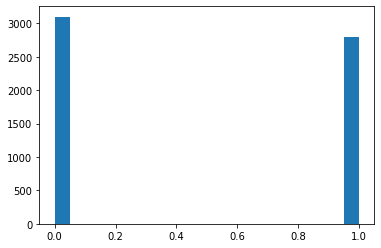

In [631]:
# Balance of predictor variable:
plt.hist(y_over, bins = 20, label = "TenYearCHD distribution")

In [632]:

estimator = make_pipeline(StandardScaler(), Normalizer() ,LogisticRegression())

In [633]:
estimator.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('normalizer', Normalizer()),
                ('logisticregression', LogisticRegression())])

In [634]:
# Predictions:
predictions = estimator.predict(X_test)

In [635]:
confusion_matrix(y_test, predictions)

array([[418, 203],
       [183, 374]])

In [636]:
print(classification_report(y_test, predictions, labels=None, target_names=None))

              precision    recall  f1-score   support

           0       0.70      0.67      0.68       621
           1       0.65      0.67      0.66       557

    accuracy                           0.67      1178
   macro avg       0.67      0.67      0.67      1178
weighted avg       0.67      0.67      0.67      1178

